# Execute the code below

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

# Multivariate linear regression with Scikit-Learn

The equation of an univariate linear regresion is a line : aX +b

The equation of a multivariate linear regression with 2 variables is a plan : aW + bX + c

The equation of a multivariate linear regression with n variables is a hyperplan : a1 X1 + a2 X2 + .... + an Xn + b


## Let's start with 2 variables
With Plotly express, show a [3D scatterplot ](https://plotly.com/python/plotly-express/#3d-coordinates)with :
- X-axis : MAX temperature
- Y-axis : MIN temperature
- Z-axis : Sunhours


In [2]:
df_weather

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.000,...,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.000,...,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.000,...,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.000,...,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.000,...,-2,143,116,116,0,1,8.7,very bad,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,13,10,13,10,12,11,0.0,96,7.375,...,8,119,143,116,0,1,8.7,not good not bad,12,27
361,2019-12-28,11,5,12,7,8,8,0.0,93,7.625,...,4,143,116,116,0,1,6.9,very bad,12,28
362,2019-12-29,9,2,11,3,6,7,0.0,86,10.000,...,0,116,116,116,0,1,8.7,very bad,12,29
363,2019-12-30,12,4,7,5,9,9,0.0,61,10.000,...,4,113,113,113,0,1,8.7,very bad,12,30


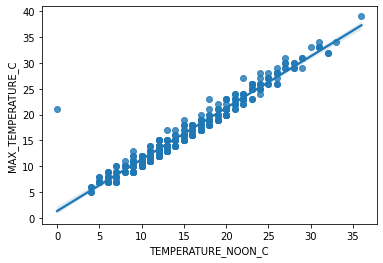

In [3]:
sns.regplot(data = df_weather, x = "TEMPERATURE_NOON_C", y = "MAX_TEMPERATURE_C")

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
modelLR = LinearRegression()

In [6]:
type(modelLR)

sklearn.linear_model._base.LinearRegression

In [7]:
X = df_weather[["SUNHOUR", "MIN_TEMPERATURE_C"]]
y = df_weather["MAX_TEMPERATURE_C"]

In [8]:
df_weather[["SUNHOUR", "MIN_TEMPERATURE_C"]]

,SUNHOUR,MIN_TEMPERATURE_C
0,5.1,4
1,8.7,5
2,8.7,0
3,5.1,-1
4,8.7,-1
...,...,...
360,8.7,10
361,6.9,5
362,8.7,2
363,8.7,4


In [9]:
modelLR.fit(X, y)

LinearRegression()

In [10]:
modelLR.coef_

array([0.66222402, 0.98867383])

In [11]:
modelLR.intercept_

1.6488837312596765

In [13]:
0.66222402 * 12 + 0.98867383 * 10 + 1.6488837312596765

19.482310271259674

In [14]:
modelLR.predict([[5.1, 4]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.98092154])

In [15]:
df_weather["max_temp_predict"] = modelLR.predict(df_weather[["SUNHOUR", "MIN_TEMPERATURE_C"]])

In [16]:
df_weather.columns

Index(['DATE', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_MORNING',
       'WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM',
       'UV_INDEX', 'SUNHOUR', 'OPINION', 'MONTH', 'DAY', 'max_temp_predict'],
      dtype='object')

In [17]:
modelLR.score(X, y)

0.8674787980774968

In [18]:
X = df_weather[['MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_MORNING',
       'WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM',
       'UV_INDEX', 'SUNHOUR']]
y = df_weather["MAX_TEMPERATURE_C"]

In [19]:
modelLR.fit(X, y)

LinearRegression()

In [20]:
modelLR.score(X, y)

0.9940315227972812

In [21]:
modelLR.coef_

array([ 5.74318411e-02, -2.43528776e-03, -8.26837441e-02,  1.88168237e-01,
        1.77191532e-01,  5.21049916e-03, -2.79532245e-03,  8.43357368e-03,
       -1.88790203e-03, -6.33151830e-03,  5.83020168e-01, -3.64323465e-02,
        5.79203396e-02,  5.21813394e-04,  4.08326128e-05, -2.74529872e-04,
       -1.70870262e-16, -2.89012738e-02, -2.25701338e-02])

In [22]:
from sklearn.linear_model import Ridge
modelRi = Ridge(alpha = 0)
modelRi.fit(X, y)
modelRi.score(X, y)

0.9940315227972812

In [23]:
modelRi.coef_

array([ 5.74318411e-02, -2.43528776e-03, -8.26837441e-02,  1.88168237e-01,
        1.77191532e-01,  5.21049916e-03, -2.79532245e-03,  8.43357368e-03,
       -1.88790203e-03, -6.33151830e-03,  5.83020168e-01, -3.64323465e-02,
        5.79203396e-02,  5.21813394e-04,  4.08326128e-05, -2.74529872e-04,
       -1.69132838e-16, -2.89012738e-02, -2.25701338e-02])

In [24]:
modelRi = Ridge(alpha = 10000)
modelRi.fit(X, y)
modelRi.score(X, y)

0.9735555600666693

In [25]:
modelRi.coef_

array([ 0.09085645, -0.02193422,  0.08547004,  0.1392441 ,  0.15280786,
       -0.000375  , -0.06727133, -0.00522907, -0.01201123, -0.0284427 ,
        0.16725201,  0.08638798,  0.13742009, -0.00075269, -0.00026809,
       -0.00180038,  0.        ,  0.00986924,  0.02994225])

In [26]:
# Complete x, y and z in the script below:
px.scatter_3d(x = "MIN_TEMPERATURE_C", 
              y = "MAX_TEMPERATURE_C", 
              z= "SUNHOUR", 
              data_frame=df_weather)


Is it hard to read the 3D scatterplot ? You can move it with your mouse.

### Let's predict
You have to predict the MAX temperature from 2 variables :
- MIN temperature
- Sunhours

Hey, it's the reason why X has 2 brackets and is uppercase and y has a simple bracket and is lowercase . It can take multiple variables (X) to predict only one target (y). 

**Remember to save the result of your prediction in a new column 'predict'.**

In [27]:
# Your code here :
X = 
y = 


SyntaxError: ignored

# Live coding 20221214 Train test split


In [28]:
X = df_weather[['MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_MORNING',
       'WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM',
       'UV_INDEX', 'SUNHOUR']]
y = df_weather["MAX_TEMPERATURE_C"]

In [29]:
modelLR = LinearRegression()
modelLR.fit(X, y)

LinearRegression()

In [30]:
modelLR.score(X, y)

0.9940315227972812

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
def simple_carre(integer):
    return integer, integer * integer

In [34]:
simple_carre(4)

(4, 16)

In [35]:
simple, carre = simple_carre(4)

In [36]:
simple

4

In [37]:
carre

16

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, shuffle = True, 
                                                    )
X_train

,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR
312,5,28,5,9,9,10.1,86,9.375,1014,65.500,10,8,5,116,122,302,0,1,3.5
300,9,19,10,11,11,1.7,90,6.375,1020,91.625,12,9,7,266,266,119,0,1,3.8
185,17,20,19,28,30,0.6,67,10.000,1018,18.250,32,19,23,116,116,116,0,1,15.9
126,6,13,6,14,12,1.2,72,8.000,1021,52.875,14,9,9,116,119,266,0,1,10.3
220,19,37,20,21,22,5.5,80,9.750,1010,51.500,25,19,21,353,176,116,0,6,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,9,17,9,17,17,0.3,65,9.375,1021,43.125,19,14,11,116,116,116,0,1,11.4
246,13,17,13,19,20,0.3,69,10.000,1024,32.500,22,14,17,113,116,176,0,1,7.8
171,10,13,12,20,19,0.5,70,9.875,1021,47.750,20,12,16,116,116,176,0,1,14.7
114,7,33,9,13,12,4.4,80,9.375,1007,73.000,13,8,8,353,353,176,0,1,9.3


In [40]:
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)
modelLR.score(X_train, y_train)

0.9940778889475473

In [41]:
modelLR.score(X_test, y_test)

0.9932884352279842

In [42]:
X = df_weather[['MIN_TEMPERATURE_C']]
y = df_weather["MAX_TEMPERATURE_C"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, shuffle = True)

In [44]:
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)
modelLR.score(X_train, y_train)

0.7828802277026512

In [45]:
modelLR.score(X_test, y_test)

0.715946918136383

In [46]:
modelLR.score(X_test, y_test)

0.715946918136383

In [47]:
modelLR.predict(X_test)

array([15.41028483, 11.77978569, 15.41028483, 22.67128309, 12.98995207,
       16.6204512 , 21.46111671, 25.09161585, 11.77978569, 11.77978569,
        8.14928656, 10.56961931, 21.46111671, 23.88144947, 17.83061758,
       11.77978569, 11.77978569, 20.25095034,  8.14928656,  9.35945294,
       10.56961931, 14.20011845, 12.98995207, 22.67128309, 11.77978569,
       19.04078396, 21.46111671, 11.77978569, 21.46111671, 12.98995207,
       19.04078396, 23.88144947, 16.6204512 , 20.25095034, 15.41028483,
       23.88144947, 21.46111671, 12.98995207, 19.04078396, 12.98995207,
       22.67128309, 11.77978569, 19.04078396, 12.98995207, 26.30178223,
       12.98995207, 21.46111671,  8.14928656, 15.41028483,  8.14928656,
       14.20011845, 15.41028483, 26.30178223, 19.04078396, 19.04078396,
       23.88144947, 15.41028483, 21.46111671, 20.25095034, 17.83061758,
       23.88144947, 11.77978569, 19.04078396, 23.88144947, 16.6204512 ,
       14.20011845, 16.6204512 , 12.98995207, 14.20011845, 10.56

In [48]:
from sklearn.metrics import r2_score

In [49]:
r2_score(y_test, modelLR.predict(X_test))

0.715946918136383

### Let's visualize
With Plotly express, show a 3D scatterplot with :

- X-axis : your new 'predict' column
- Y-axis : MIN temperature
- Z-axis : Sunhours



In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [51]:
mean_squared_error(y_test, modelLR.predict(X_test), squared = False)

3.2715596698432376

In [52]:
mean_absolute_error(y_test, modelLR.predict(X_test))

2.671892950382023

In [53]:
# Your code here :


In [54]:
X = df_weather[['MIN_TEMPERATURE_C', 'SUNHOUR']]
y = df_weather["MAX_TEMPERATURE_C"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, random_state= 67)

modelLR = LinearRegression()
modelLR.fit(X_train, y_train)
print("train score :",modelLR.score(X_train, y_train))
print("test score :",modelLR.score(X_test, y_test))

print("MAE:", mean_absolute_error(y_test, modelLR.predict(X_test)))
print("RMSE:", mean_squared_error(y_test, modelLR.predict(X_test), squared = False))

train score : 0.8679669198013802
test score : 0.8647768167711734
MAE: 1.9305372087106982
RMSE: 2.4752803714173486


In [55]:
X = df_weather[['MIN_TEMPERATURE_C']]
y = df_weather["MAX_TEMPERATURE_C"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, random_state= 67)

modelLR = LinearRegression()
modelLR.fit(X_train, y_train)
print("train score :",modelLR.score(X_train, y_train))
print("test score :",modelLR.score(X_test, y_test))

print("MAE:", mean_absolute_error(y_test, modelLR.predict(X_test)))
print("RMSE:", mean_squared_error(y_test, modelLR.predict(X_test), squared = False))

train score : 0.772477779983619
test score : 0.7558001364363359
MAE: 2.6300290632845376
RMSE: 3.3263774573995937


**Move the cube with your mouse. Hey your 3D-scatterplot has a special shape : it's a plan !**

## Multivariate linear regressions with N-variables
Make a prediction with the maximum number of variables. But beware : 
- variables must be numeric
- your target (MAX temperature) should not be present in variables

Store your prediction in a new column 'predict2'.

In our 3D human vision, we can't represent a hyperplan. But, let's trust in our computer, it can calculate. So trust it and show a simple scatterplot with :
- X-axis : Date
- Y-axis : MAX temperatures in blue dots and 'predict2' in orange dots

Expected result:

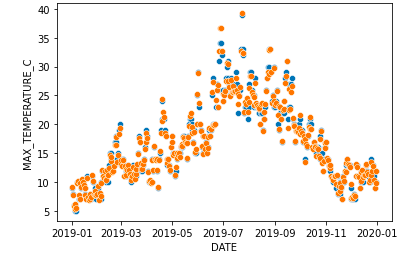

In [ ]:
# Your code here :



You can read coefficient for each column with the attribute `.coef_`. Which column has the biggest coefficient ?

In [ ]:
# Your code here :
